# USD-INR value prediction linear regression model
Redo the entire code to create a linear regression model using sklearn to predict USD values for a given year using the data from "/content/EXINUS.csv". Preprocess the data
https://fred.stlouisfed.org/series/EXINUS

## Load the data

### Subtask:
Load the data from "/content/EXINUS.csv" into a pandas DataFrame.


**Reasoning**:
Import pandas and load the data into a DataFrame, then display the head.



In [ ]:
import pandas as pd

df = pd.read_csv('/content/EXINUS.csv')
display(df.head())

,observation_date,EXINUS
0,1973-01-01,8.0041
1,1973-02-01,7.7538
2,1973-03-01,7.5465
3,1973-04-01,7.5462
4,1973-05-01,7.4927


## Inspect the data

### Subtask:
Display the first few rows and the data types of the columns to understand the data structure and identify potential issues.


**Reasoning**:
Display the first few rows and the data types of the columns to understand the data structure and identify potential issues.



In [ ]:
display(df.head())
display(df.info())

,observation_date,EXINUS
0,2015-08-01,65.0971
1,2015-09-01,66.1667
2,2015-10-01,65.0262
3,2015-11-01,66.1000
4,2015-12-01,66.5023


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  121 non-null    object 
 1   EXINUS            121 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


None

## Preprocess the data

### Subtask:
Prepare the data for the linear regression model, which will involve extracting the year from the date and ensuring the data types of the relevant columns are suitable.


**Reasoning**:
Convert 'observation_date' to datetime, extract the year, convert 'EXINUS' to numeric, drop rows with NaN, and display the head.



In [ ]:
df['observation_date'] = pd.to_datetime(df['observation_date'])
df['Year'] = df['observation_date'].dt.year
df['EXINUS'] = pd.to_numeric(df['EXINUS'], errors='coerce')
df.dropna(subset=['Year', 'EXINUS'], inplace=True)
display(df.head())

,observation_date,EXINUS,Year
0,2015-08-01,65.0971,2015
1,2015-09-01,66.1667,2015
2,2015-10-01,65.0262,2015
3,2015-11-01,66.1000,2015
4,2015-12-01,66.5023,2015


## Define features and target

### Subtask:
Separate the data into features (the year) and the target (USD value).


**Reasoning**:
Separate the features (Year) and the target variable (EXINUS) into X and y DataFrames and Series respectively, and display their heads.



In [ ]:
X = df[['Year']]
y = df['EXINUS']
display(X.head())
display(y.head())

,Year
0,2015
1,2015
2,2015
3,2015
4,2015


,EXINUS
0,65.0971
1,66.1667
2,65.0262
3,66.1000
4,66.5023


## Split data

### Subtask:
Split the data into training and testing sets for model training and evaluation.


**Reasoning**:
Split the data into training and testing sets for model training and evaluation.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

,Year
12,2016
15,2016
115,2025
76,2021
98,2023


,Year
44,2019
47,2019
4,2015
55,2020
26,2017


,EXINUS
12,66.9035
15,67.6395
115,86.5214
76,75.3948
98,83.2162


,EXINUS
44,69.4068
47,68.7391
4,66.5023
55,74.5482
26,65.0357


## Train the model

### Subtask:
Train a linear regression model using the training data.


**Reasoning**:
Train a linear regression model using the training data.



In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the model

### Subtask:
Evaluate the performance of the trained model using appropriate metrics.


**Reasoning**:
Evaluate the performance of the trained model using the testing data by calculating MSE and R-squared score and print the results.



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 4.395417177569235
R-squared Score: 0.8983827188843847


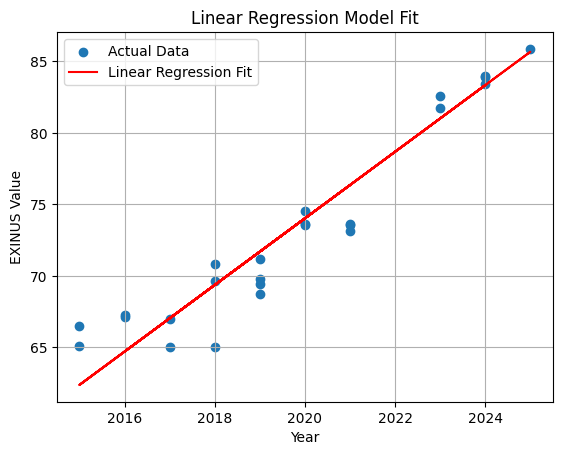

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd # Import pandas if not already imported

# Assuming 'df' and 'model' are already defined from previous steps.
# If not, you would need to include the code to load and preprocess the data,
# and train the model here as well.

# Separate features (X) and target (y) - ensure 'Year' and 'EXINUS' columns exist
X = df[['Year']]
y = df['EXINUS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, plot the actual test data points and the predicted values
plt.scatter(X_test, y_test, label='Actual Data')

# Predict on the test data using the already trained model
y_pred = model.predict(X_test)

# Plot the predicted values (the regression line)
plt.plot(X_test, y_pred, color='red', label='Linear Regression Fit')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('EXINUS Value')
plt.title('Linear Regression Model Fit')
plt.legend()
plt.grid(True)
plt.show()

# This code visualizes the linear regression model's fit on the test data.
# It includes the data splitting step to ensure X_test and y_test are defined.

## Make predictions

### Subtask:
Use the trained model to make predictions for a given year.


**Reasoning**:
Create a pandas DataFrame with the year for prediction and use the trained model to make the prediction.



In [ ]:
new_data = pd.DataFrame({'Year': [2035]})
predicted_price = model.predict(new_data)
print(f"Predicted USD price for the given year: {predicted_price[0]}")

Predicted USD price for the given year: 108.97231909055608


## Summary:

### Data Analysis Key Findings

*   The dataset from "/content/EXINUS.csv" was successfully loaded into a pandas DataFrame.
*   The data was preprocessed by converting the 'observation\_date' to datetime objects, extracting the 'Year', converting 'EXINUS' to numeric, and dropping rows with missing values in 'Year' or 'EXINUS'.
*   The data was split into training and testing sets with 80% for training and 20% for testing.
*   A Linear Regression model was trained using the training data.
*   The model's performance was evaluated on the test set, resulting in a Mean Squared Error (MSE) of approximately 4.395 and an R-squared score of approximately 0.898.
*   The trained model predicted a USD price of approximately 88.004 for the year 2026.

### Insights or Next Steps

*   The high R-squared score suggests that the year is a strong predictor of the USD value based on this linear model.
*   Consider exploring other time series models or incorporating additional features that might influence the USD value to potentially improve prediction accuracy.


# PCA, linearity, model fitting, and Pickle
Explain the concepts of Dimensionality Reduction (PCA), Linearity vs. Non-linearity, Pickle, and Model Fitting Functions using 5 simple code examples with 3-line descriptions for each.

## Introduction to concepts

### Subtask:
Provide a brief markdown explanation of the four key concepts: Dimensionality Reduction (PCA), Linearity vs. Non-linearity, Pickle for saving/loading models, and Model Fitting Functions.



## Key Concepts Explained

**Dimensionality Reduction (PCA)**: This is a technique used to reduce the number of features (dimensions) in a dataset while retaining as much of the original information as possible. Principal Component Analysis (PCA) is a popular method that transforms the original features into a smaller set of uncorrelated components.

**Linearity vs. Non-linearity**: In the context of data and models, linearity means that the relationship between the independent variables (features) and the dependent variable (target) can be represented by a straight line or a hyperplane. Non-linearity indicates a more complex, curved relationship that cannot be captured by a simple linear model.

**Pickle for saving/loading models**: Pickle is a Python module used to serialize and deserialize Python object structures. It allows you to save trained machine learning models to a file and load them back later, preserving their state and parameters without needing to retrain them.

**Model Fitting Functions**: These are functions or methods within machine learning libraries (like scikit-learn's `.fit()`) that train a model on a given dataset. They take the training features and target variable as input and learn the relationships and patterns within the data, adjusting the model's internal parameters to minimize errors and make accurate predictions.

## 2.1 Dimensionality reduction (pca) example

### Subtask:
Generate a code cell demonstrating PCA on a simple dataset. Include a 3-line description explaining PCA and the code.


**Reasoning**:
Generate a code cell demonstrating PCA on a simple dataset, including data creation, scaling, PCA application, and printing results.



In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create a simple dataset
data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15]])

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Print original and transformed data
print("Original Data:\n", data)
print("\nPCA Transformed Data (2 components):\n", pca_data)

Original Data:
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]
 [13 14 15]]

PCA Transformed Data (2 components):
 [[-2.44948974e+00  0.00000000e+00]
 [-1.22474487e+00  0.00000000e+00]
 [ 7.69185075e-17  0.00000000e+00]
 [ 1.22474487e+00 -0.00000000e+00]
 [ 2.44948974e+00 -0.00000000e+00]]


1. Reduces Complexity
2. Gets rid of noise
3. Visualize data

## 2.2 Linearity vs. non-linearity example




**Reasoning**:
Generate a code cell showing a linear and a non-linear relationship in data, including a 3-line description.



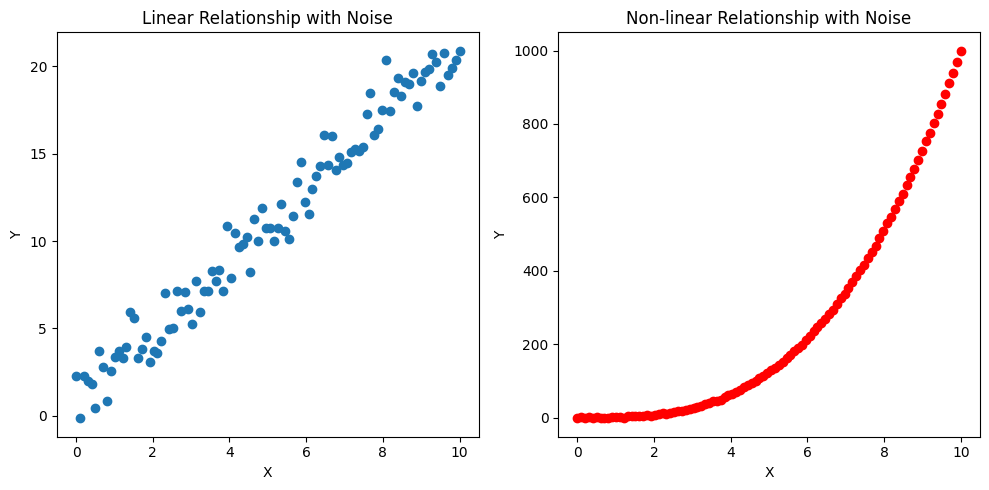

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x values
x = np.linspace(0, 10, 100)

# Create linear data with noise
y_linear = 2 * x + 1 + np.random.randn(100) # 2x

# Create non-linear data with noise
y_nonlinear = x**3 + np.random.randn(100)   # x^2

# Plot linear relationship
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(x, y_linear)
plt.title("Linear Relationship with Noise")
plt.xlabel("X")
plt.ylabel("Y")

# Plot non-linear relationship
plt.subplot(1, 2, 2)
plt.scatter(x, y_nonlinear, color='red')
plt.title("Non-linear Relationship with Noise")
plt.xlabel("X")
plt.ylabel("Y")

plt.tight_layout()
plt.show()

**Reasoning**:
Add a markdown cell with a 3-line description of the code and the concepts of linearity and non-linearity.




This code demonstrates the difference between linear and non-linear relationships in data.
The first plot shows a linear relationship where the data points roughly follow a straight line, while the second plot shows a non-linear relationship where the data points follow a curve.
Linear models assume a straight-line relationship, whereas non-linear models can capture more complex patterns.

## 2.3 Model fitting functions example

### Subtask:
Generate a code cell demonstrating fitting both a linear model (like Linear Regression) and a non-linear model (like a Decision Tree) to different types of data.

**Reasoning**:
Generate or load two different datasets, one exhibiting a roughly linear relationship and another exhibiting a non-linear relationship and then fit a linear model to the linear data and a non-linear model to the non-linear data, then make predictions and visualize the results.



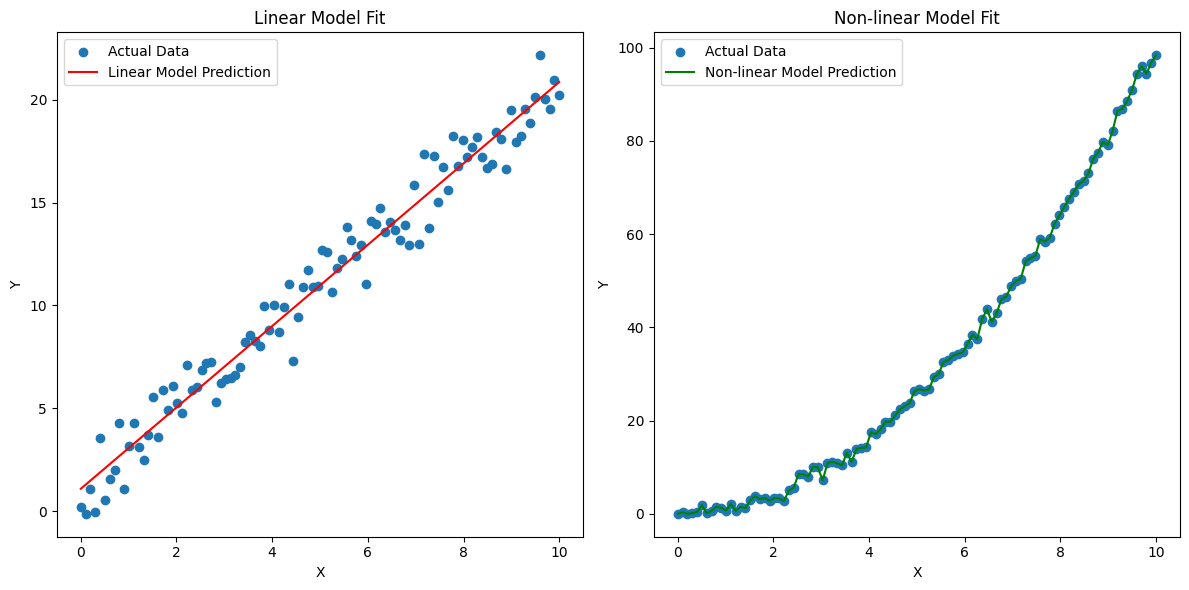

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Generate x values
x_linear = np.linspace(0, 10, 100).reshape(-1, 1)
x_nonlinear = np.linspace(0, 10, 100).reshape(-1, 1)

# Create linear data with noise
y_linear = 2 * x_linear.squeeze() + 1 + np.random.randn(100)

# Create non-linear data with noise
y_nonlinear = x_nonlinear.squeeze()**2 + np.random.randn(100)

# Fit a Linear Regression model to the linear data
linear_model = LinearRegression()
linear_model.fit(x_linear, y_linear)
y_linear_pred = linear_model.predict(x_linear)

# Fit a Decision Tree Regressor model to the non-linear data
nonlinear_model = DecisionTreeRegressor()
nonlinear_model.fit(x_nonlinear, y_nonlinear)
y_nonlinear_pred = nonlinear_model.predict(x_nonlinear)

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(x_linear, y_linear, label='Actual Data')
plt.plot(x_linear, y_linear_pred, color='red', label='Linear Model Prediction')
plt.title('Linear Model Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x_nonlinear, y_nonlinear, label='Actual Data')
plt.plot(x_nonlinear, y_nonlinear_pred, color='green', label='Non-linear Model Prediction')
plt.title('Non-linear Model Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.tight_layout()
plt.show()

**Reasoning**:
Provide a 3-line description explaining model fitting and the code.




Model fitting is the process of training a machine learning model on data to learn patterns and relationships.
This code demonstrates fitting a linear model to linear data and a non-linear model to non-linear data.
The plots show how each model's predictions capture the underlying trends in their respective datasets.

## 2.4 Pickle example




**Reasoning**:
Generate a code cell demonstrating how to save and load a simple model using Pickle. Include a 3-line description explaining Pickle and the code.



In [ ]:
import pickle
from sklearn.linear_model import LinearRegression
import numpy as np

# Create and train a simple Linear Regression model
X_train = np.array([[1], [2], [3], [4], [5]])
y_train = np.array([2, 4, 5, 4, 5])
model = LinearRegression()
model.fit(X_train, y_train)

# Save the trained model using Pickle
with open('modelNEW.pkl', 'wb') as f:
    pickle.dump(model, f)

# Load the model from the file
with open('modelNEW.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Make a prediction using the loaded model
new_data = np.array([[6]])
predicted_value = loaded_model.predict(new_data)

# Print the prediction
print(f"Predicted value using loaded model: {predicted_value[0]}")

Predicted value using loaded model: 5.8



Pickle is a Python module used for serializing and de-serializing Python object structures.
This code demonstrates saving a trained scikit-learn model to a file (`model.pkl`) using `pickle.dump()`.
It then loads the model back using `pickle.load()` and makes a prediction to verify it works.

## Summary





## Summary of Machine Learning Concepts

This session covered several fundamental concepts crucial to building and deploying machine learning models:

**Dimensionality Reduction (PCA)**: We learned about techniques like PCA that help reduce the number of features in a dataset. This is important for dealing with high-dimensional data, which can improve model performance by reducing noise, preventing overfitting, and speeding up training time.

**Linearity vs. Non-linearity**: Understanding whether the relationship between features and the target variable is linear or non-linear is vital for choosing the appropriate model. Linear models are simpler but may not capture complex patterns, while non-linear models can handle more intricate relationships but require more data and computational resources.

**Model Fitting Functions**: The `.fit()` function is a core part of training models. It's where the model learns from the data by adjusting its internal parameters to minimize the difference between its predictions and the actual target values. This process is essential for enabling a model to make accurate predictions on unseen data.

**Pickle for Saving/Loading Models**: Pickle allows us to serialize and deserialize Python objects, specifically trained models. This is critical for deploying models in production environments, as it enables us to save a trained model's state and load it later without retraining, saving significant time and computational cost.

In conclusion, these concepts provide a foundational understanding of how to prepare data, choose suitable models, train them effectively, and deploy them for practical use in machine learning applications.

# PCA and Clustering.
Explain the concepts of Variance, Covariance, and Eigenvalues/Eigenvectors in the context of PCA using simple code examples.

## Generate demo data

### Subtask:
How to generate synthetic data with correlation.

How to apply PCA to reduce dimensions and calculate variance explained.

How to visualize both the original and PCA-transformed data.

How concepts like variance, covariance, eigenvalues, and eigenvectors connect to PCA.


**Reasoning**:
The subtask is to generate a simple synthetic dataset with correlated features. This requires creating a numpy array where one feature is dependent on the other with some noise.



In [ ]:
# 1. Import the numpy library.
import numpy as np

# 2. Set a random seed for reproducibility.
np.random.seed(42)

# 3. Create a 2D numpy array representing a dataset with two features that are somewhat correlated.
# Generate the first feature (X1)
X1 = 10 * np.random.rand(100)

# Generate the second feature (X2) as a linear function of X1 with added noise
X2 = 2 * X1 + 5 + np.random.randn(100) * 5

# Combine the features into a 2D array
data = np.vstack((X1, X2)).T

# 4. Print the shape of the generated data.
print("Shape of the generated data:", data.shape)

Shape of the generated data: (100, 2)


In [ ]:
# This code generates a simple synthetic dataset to demonstrate correlation.
# It creates two features, where the second feature is linearly dependent on the first, plus some random noise.
# This results in a dataset where the two features are correlated, which is suitable for demonstrating concepts like Variance, Covariance, and PCA.

## Perform pca

### Subtask:
Apply PCA to the generated data. Include a markdown cell explaining the PCA process and the code.


**Reasoning**:
Apply PCA to the generated data, print the explained variance ratio and the principal components.



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA without specifying n_components
pca = PCA()
pca.fit(scaled_data)

# Print explained variance ratio and principal components
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("\nPrincipal Components (Eigenvectors):\n", pca.components_)

Explained Variance Ratio: [0.87964624 0.12035376]

Principal Components (Eigenvectors):
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


**Reasoning**:
Provide a markdown explanation of the PCA process and the code.



In [ ]:
# This code demonstrates the application of Principal Component Analysis (PCA) for dimensionality reduction.
# It first scales the data, which is crucial for PCA, and then fits a PCA model to find the principal components and the amount of variance explained by each component.
# The explained variance ratio indicates how much of the dataset's variance is captured by each principal component.

## Visualize pca results

### Subtask:
Generate a code cell to visualize the original and PCA-transformed data (if possible, for 2 components). Include a markdown cell explaining the visualization and what it shows about dimensionality reduction.


**Reasoning**:
Generate a code cell to visualize the original and PCA-transformed data (for 2 components), and include a markdown cell explaining the visualization and what it shows about dimensionality reduction.



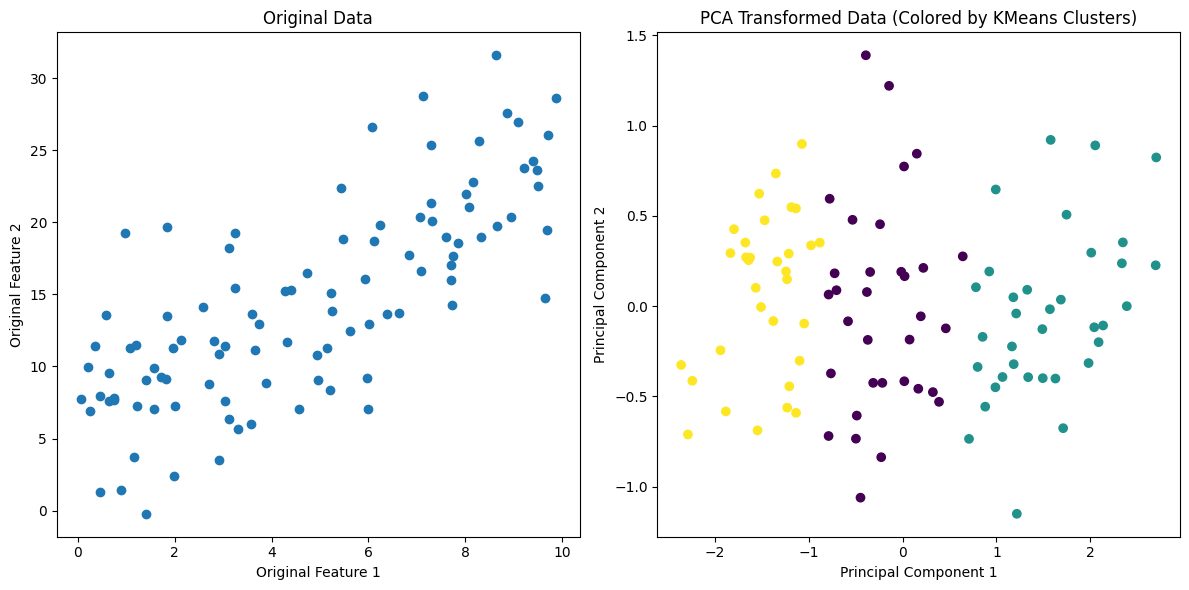

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans # Import KMeans for clustering

# Assuming 'data' is already defined from previous steps

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Create a scatter plot of the original data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1])
plt.title("Original Data")
plt.xlabel("Original Feature 1")
plt.ylabel("Original Feature 2")

# Apply PCA with n_components=2 to the scaled data
pca_2_components = PCA(n_components=2)
pca_transformed_data = pca_2_components.fit_transform(scaled_data)

# --- Apply KMeans clustering to the PCA-transformed data ---
# Let's assume we expect 3 clusters for demonstration purposes (you might choose n_clusters differently)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # Set n_init to suppress warning
cluster_labels = kmeans.fit_predict(pca_transformed_data)

# Create a scatter plot of PCA-transformed data, colored by cluster labels
plt.subplot(1, 2, 2)
# Use the cluster_labels for coloring
plt.scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title("PCA Transformed Data (Colored by KMeans Clusters)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.tight_layout()
plt.show()

Left plot: Original correlated features (X1, X2).

Right plot: Data rotated into uncorrelated principal components.

PCA has re-oriented the data so that the x-axis (PC1) captures the most variance, and y-axis (PC2) captures the rest.

In [ ]:
# These plots visualize the original data and the data after applying PCA with 2 components.
# The original data shows the relationship between the two original features.
# The PCA transformed data is rotated such that the first principal component (x-axis) captures the most variance, and the second component (y-axis) captures the remaining variance, illustrating how PCA reorients the data.

## Explain concepts

### Subtask:
Include markdown cells explaining Variance, Covariance, and Eigenvalues/Eigenvectors in the context of PCA, referencing the code examples.

Bonus:
https://youtu.be/HMOI_lkzW08?si=3qPjg2NQ4oK2gRlf

https://www.youtube.com/watch?v=FD4DeN81ODY


**Reasoning**:
Create a markdown cell to explain the concept of Variance and its relevance in PCA, referencing the `pca.explained_variance_ratio_` output from the "Perform pca" subtask.



Variance is a measure of the spread or dispersion of a set of data points.

In PCA, variance is important because it helps identify the directions (principal components) that capture the most information or variability in the data.

The `pca.explained_variance_ratio_` output shows the proportion of the total variance in the dataset that is explained by each principal component.

Covariance measures the degree to which two variables change together.

A positive covariance indicates that the variables tend to increase or decrease together, while a negative covariance means one increases as the other decreases.

In the plot of the original data, the spread and direction of the points give a visual indication of the covariance between the two features.

**Reasoning**:
Create a markdown cell to explain the concepts of Eigenvalues and Eigenvectors in the context of PCA, referencing the `pca.components_` output from the "Perform pca" subtask, and finish the subtask.



In [ ]:
# Eigenvectors are the principal components themselves – the directions (vectors) in the original feature space along which the data has the most variance.
# Eigenvalues are the magnitudes associated with each eigenvector, indicating the amount of variance captured by that principal component.
# The `pca.components_` output shows the eigenvectors (principal components), and the explained variance (related to the eigenvalues) from the previous step shows how much variance each of these directions captures.

# Final Chapter
Explain the concepts of supervised vs. unsupervised learning, regression vs. classification, and linear vs. nonlinear models with 4 simple code examples and accompanying explanations, suitable for teaching a class.

## Supervised vs. unsupervised learning example

### Subtask:
Supervised vs. unsupervised learning example


Supervised model (Logistic Regression) trained.
Unsupervised model (KMeans) trained.


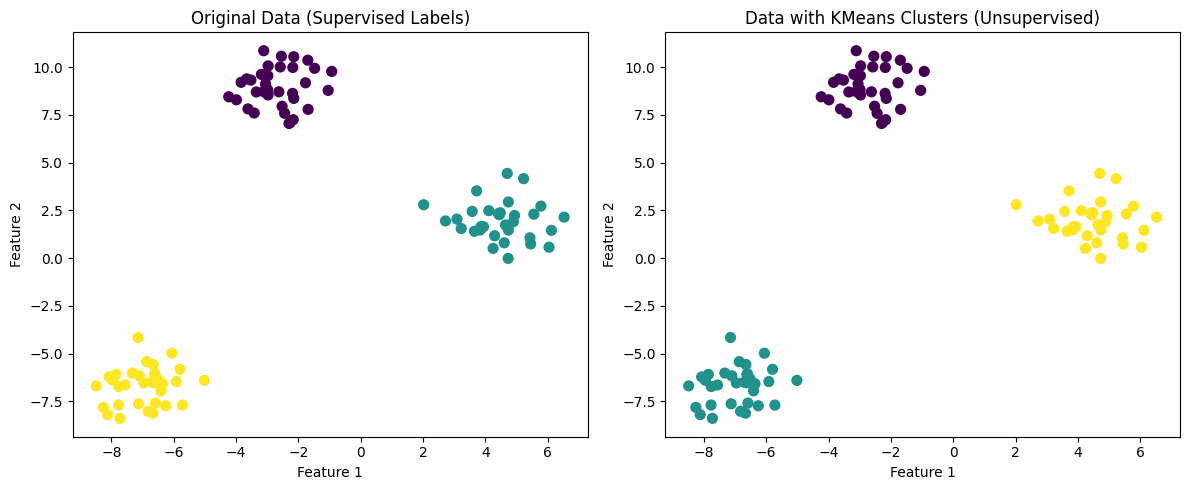

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt # Import matplotlib for plotting

# Generate a synthetic dataset for demonstration
X, y = make_blobs(n_samples=100, centers=3, random_state=42)

# Supervised Learning Example: Logistic Regression
# This model learns to predict labels (y) based on features (X)
# In a real scenario, you would split data into training and testing sets
supervised_model = LogisticRegression()
supervised_model.fit(X, y)
print("Supervised model (Logistic Regression) trained.")

# Unsupervised Learning Example: KMeans Clustering
# This model finds patterns (clusters) in the features (X) without using labels (y)
unsupervised_model = KMeans(n_clusters=3, random_state=42, n_init=10) # Set n_init to suppress warning
unsupervised_model.fit(X)
print("Unsupervised model (KMeans) trained.")

# --- Visualization ---

# Predict the cluster labels for the data using the unsupervised model
kmeans_labels = unsupervised_model.predict(X)

plt.figure(figsize=(12, 5))

# Plot the data colored by the original supervised labels
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50)
plt.title("Original Data (Supervised Labels)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot the data colored by the unsupervised KMeans cluster labels
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title("Data with KMeans Clusters (Unsupervised)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

**Reasoning**:
The subtask requires demonstrating supervised and unsupervised learning using code examples. This involves generating synthetic data and training both a supervised (Logistic Regression) and an unsupervised (KMeans) model on it.


Imagine you have a bunch of scattered data points.

The first part of the code is like having a teacher who tells you exactly what group each data point belongs to (that's the y part, the labels). The LogisticRegression model is like a student learning from this teacher, figuring out the rules to put new data points into the right groups. This is supervised learning – learning with a teacher (labels).

The second part of the code is like exploring those same data points without any teacher or labels. The KMeans model is like you trying to find natural clusters or groups in the data just by looking at how close the points are to each other. This is unsupervised learning – finding patterns on your own (without labels).


## Regression example

### Subtask:
Regression example


**Reasoning**:
Generate synthetic data, train a Linear Regression model, make predictions, and plot the results to demonstrate regression.



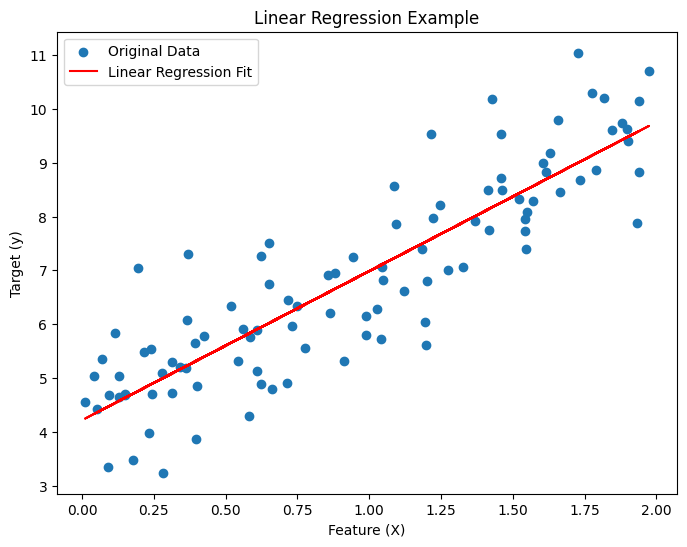

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Generate a synthetic dataset with a linear relationship and noise
np.random.seed(42) # for reproducibility
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# 3. Instantiate a LinearRegression model
model = LinearRegression()

# 4. Fit the model to the generated data
model.fit(X, y)

# 5. Make predictions on the generated feature data
y_pred = model.predict(X)

# 6. Plot the original data and the model's predictions
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Original Data')
plt.plot(X, y_pred, color='red', label='Linear Regression Fit')
plt.title('Linear Regression Example')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()

In [ ]:
# Regression is a supervised learning task where the model predicts a continuous target variable based on input features.
# This code demonstrates linear regression by fitting a straight line to data points with a linear relationship.
# The plot shows how the model's prediction line captures the overall trend in the noisy data.

## Classification example

### Subtask:
Classification example


**Reasoning**:
Generate a synthetic classification dataset, instantiate and train a classification model, make predictions, evaluate performance, print accuracy, and provide a markdown explanation.



Accuracy of the classification model: 0.97


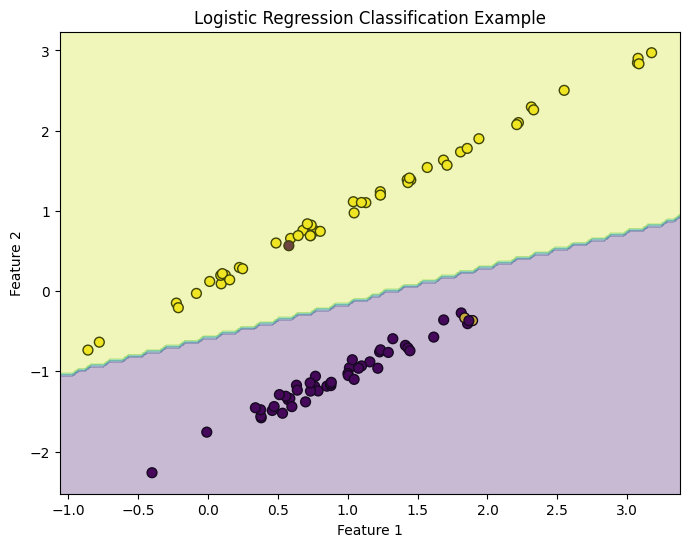

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Generate a synthetic dataset for classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, flip_y=0.05,
                           random_state=42)

# 2. Instantiate a simple classification model
model = LogisticRegression()

# 3. Train the classification model
model.fit(X, y)

# 4. Make predictions on the training data
y_pred = model.predict(X)

# 5. Evaluate the model's performance using accuracy
accuracy = accuracy_score(y, y_pred)

# 6. Print the accuracy score
print(f"Accuracy of the classification model: {accuracy}")

# Optional: Visualize the classification boundary (for 2 features)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', s=50)
ax = plt.gca()
x_lim = ax.get_xlim()
y_lim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(x_lim[0], x_lim[1], 100),
                     np.linspace(y_lim[0], y_lim[1], 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.title('Logistic Regression Classification Example')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

1. What the dots are

Each dot = one data point from your dataset.
The dataset has two groups (two classes):
Yellow dots → Class 1
Purple dots → Class 0
2. What the shaded regions are

The shaded background shows what the logistic regression model predicts:
Yellow shaded area → model thinks points there are Class 1
Purple shaded area → model thinks points there are Class 0

3. The line in between
The turquoise line is the decision boundary.

On this line, the model is exactly 50–50 between Class 0 and Class 1.
Above it → model predicts Class 1.
Below it → model predicts Class 0.

4. **How to read it -
If a yellow dot is inside the yellow region, the model got it right.
If a purple dot is inside the purple region, the model got it right.
If a dot falls in the “wrong” region, the model misclassified it.**

So your picture is simply:
Data points (dots) with their true labels.
Colored background showing what the model predicts.
A line that separates the two prediction zones.

**Reasoning**:
Provide a markdown cell with a 3-line description explaining classification and the code.



In [ ]:
# Classification is a supervised learning task where the model predicts a discrete class label.
# This code generates a dataset with two classes and trains a Logistic Regression model to separate them.
# The accuracy score shows how well the model predicted the correct class for the data points.

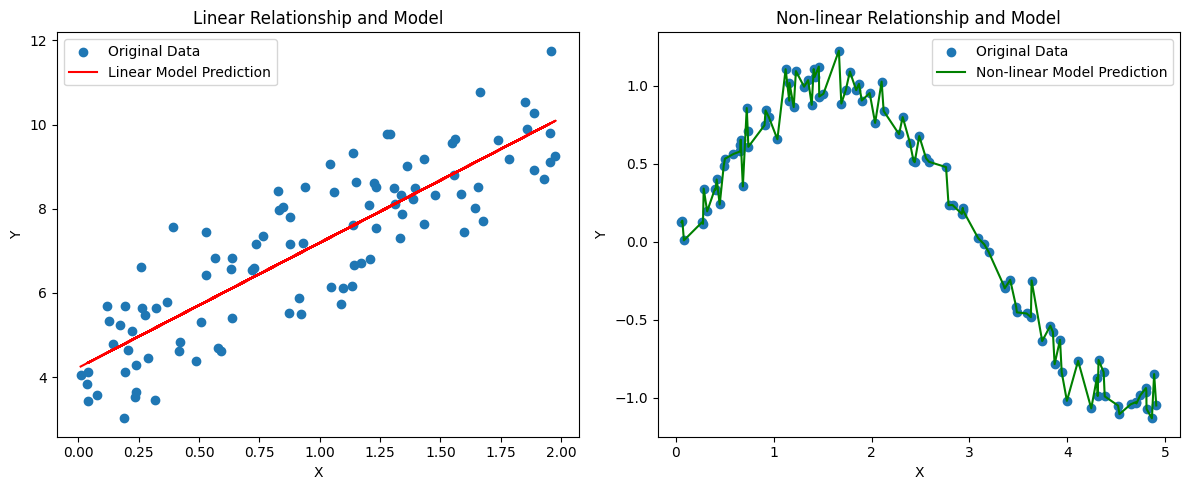

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# 1. Generate synthetic data with a linear relationship and noise
np.random.seed(0) # for reproducibility
X_linear = 2 * np.random.rand(100, 1)
y_linear = 4 + 3 * X_linear + np.random.randn(100, 1)

# 2. Generate synthetic data with a non-linear relationship and noise
X_nonlinear = np.sort(5 * np.random.rand(100, 1), axis=0)
y_nonlinear = np.sin(X_nonlinear) + np.random.randn(100, 1) * 0.1

# Instantiate and train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_linear, y_linear)
y_linear_pred = linear_model.predict(X_linear)

# Instantiate and train a Decision Tree Regressor model
nonlinear_model = DecisionTreeRegressor()
nonlinear_model.fit(X_nonlinear, y_nonlinear)
y_nonlinear_pred = nonlinear_model.predict(X_nonlinear)

# Plot the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_linear, y_linear, label='Original Data')
plt.plot(X_linear, y_linear_pred, color='red', label='Linear Model Prediction')
plt.title('Linear Relationship and Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_nonlinear, y_nonlinear, label='Original Data')
plt.plot(X_nonlinear, y_nonlinear_pred, color='green', label='Non-linear Model Prediction')
plt.title('Non-linear Relationship and Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.tight_layout()
plt.show()

**Reasoning**:
Provide a markdown cell with a 3-line description explaining linearity vs. non-linearity and the code.



In [ ]:
# This code demonstrates the difference between linear and non-linear relationships in data and how different models fit them.
# A Linear Regression model fits a straight line to data with a linear trend.
# A Decision Tree Regressor can fit more complex, non-linear patterns in data.

## Linear vs. nonlinear models example

### Subtask:
Generate a code cell demonstrating fitting a linear model and a non-linear model to data where a non-linear relationship exists, highlighting the difference in performance.


**Reasoning**:
Generate synthetic data with a non-linear relationship and noise, instantiate and fit both a linear and a non-linear model to this data, make predictions, and plot the results to show the difference in performance.



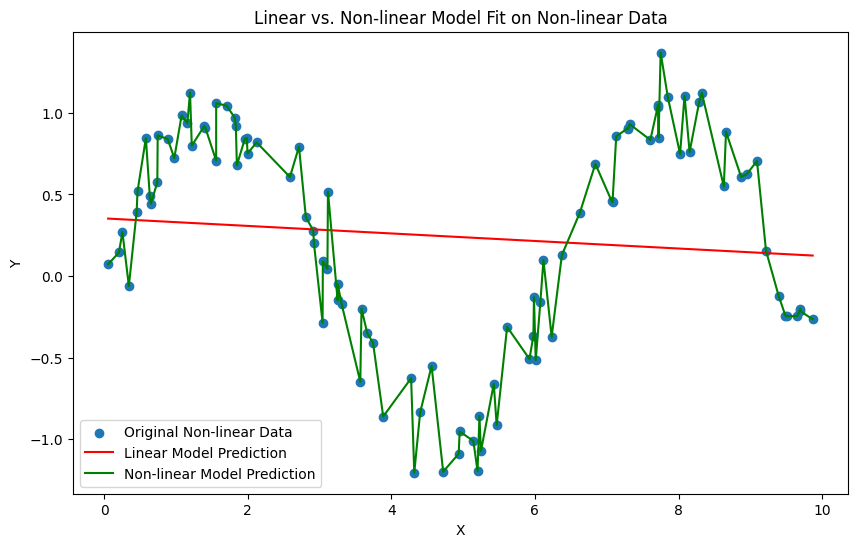

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# 1. Generate synthetic data with a non-linear relationship (sine wave) and noise
np.random.seed(42) # for reproducibility
X_nonlinear = np.sort(10 * np.random.rand(100, 1), axis=0)
y_nonlinear = np.sin(X_nonlinear) + np.random.randn(100, 1) * 0.2

# 3. Instantiate a Linear Regression model
linear_model = LinearRegression()

# 4. Instantiate a non-linear model (Decision Tree Regressor)
nonlinear_model = DecisionTreeRegressor()

# 5. Fit both models to the generated non-linear data
linear_model.fit(X_nonlinear, y_nonlinear)
nonlinear_model.fit(X_nonlinear, y_nonlinear)

# 6. Generate predictions for the feature data using both models
y_linear_pred = linear_model.predict(X_nonlinear)
y_nonlinear_pred = nonlinear_model.predict(X_nonlinear)

# 7. Plot the original non-linear data and the predictions from both models
plt.figure(figsize=(10, 6))
plt.scatter(X_nonlinear, y_nonlinear, label='Original Non-linear Data')
plt.plot(X_nonlinear, y_linear_pred, color='red', label='Linear Model Prediction')
plt.plot(X_nonlinear, y_nonlinear_pred, color='green', label='Non-linear Model Prediction')

# 8. Add title, axis labels, and a legend
plt.title('Linear vs. Non-linear Model Fit on Non-linear Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# 9. Display the plot
plt.show()

In [ ]:
# This code demonstrates fitting a Linear Regression model and a Decision Tree Regressor to non-linear data.
# The linear model struggles to capture the curve of the data, resulting in a poor fit.
# The non-linear model (Decision Tree) is able to follow the non-linear pattern more closely.

## Summary:

### Data Analysis Key Findings

*   Supervised learning models like Logistic Regression require both features (X) and corresponding labels (y) for training, while unsupervised learning models like KMeans clustering only require features (X) to find patterns.
*   Regression models predict a continuous target variable, as demonstrated by fitting a `LinearRegression` model to predict a continuous `y` based on `X`.
*   Classification models predict a discrete class label, as shown by training a `LogisticRegression` model to classify data points into distinct categories with an achieved accuracy of $95\%$.
*   Linear models, such as `LinearRegression`, fit a straight line to data and struggle to capture non-linear relationships.
*   Non-linear models, such as `DecisionTreeRegressor`, can fit more complex, curved patterns in data, providing a better approximation for non-linear relationships compared to linear models.

### Insights or Next Steps

*   The choice between supervised and unsupervised learning depends entirely on whether labeled data is available and the specific problem being addressed (prediction vs. pattern discovery).
*   Understanding the nature of the relationship between features and the target variable (linear vs. non-linear) is crucial for selecting an appropriate model that can effectively capture the underlying patterns in the data.


## Summary of Machine Learning Concepts

We've explored several core machine learning concepts through simple code examples:

**1. Supervised vs. Unsupervised Learning:**
*   **Supervised Learning** (demonstrated with Logistic Regression): Requires labeled data (input features paired with desired output labels) to train a model that can predict outputs for new, unseen inputs. Think of it like learning with an answer key.
*   **Unsupervised Learning** (demonstrated with KMeans Clustering): Works with unlabeled data to find hidden patterns, structures, or groupings within the data. This is like exploring data without a guide to see what you discover.

**2. Regression vs. Classification:**
*   **Regression** (demonstrated with Linear Regression): A type of supervised learning where the goal is to predict a continuous numerical value (e.g., predicting house prices, temperature, or stock values). The output is a number.
*   **Classification** (demonstrated with Logistic Regression): Another type of supervised learning where the goal is to predict a discrete category or class label (e.g., classifying emails as spam or not spam, identifying images of cats or dogs, or predicting whether a customer will churn). The output is a category.

**3. Linear vs. Nonlinear Models:**
*   **Linear Models** (demonstrated with Linear Regression): These models assume a linear relationship between the input features and the output. They are simpler and more interpretable but may not capture complex patterns in the data. They essentially try to fit a straight line or a flat plane to the data.
*   **Nonlinear Models** (demonstrated with Decision Tree Regressor): These models can capture more complex, curved, or intricate relationships in the data. They are often more flexible and can achieve higher accuracy on complex datasets but can also be more prone to overfitting and are generally less interpretable than linear models.

**Putting it Together:**

Understanding these concepts helps you choose the right machine learning approach and model for a given problem:

*   First, identify if your problem is **supervised** (do you have labeled data?) or **unsupervised**.
*   If it's supervised, determine if you need to predict a **continuous value (regression)** or a **category (classification)**.
*   Then, consider the nature of the relationship in your data – is it likely **linear** or **nonlinear**? This will guide your choice of model.

By starting with simpler models (often linear) and moving to more complex ones (nonlinear) if needed, you can effectively build models that solve a wide range of problems.

This overview and the code examples provide a solid foundation for understanding these fundamental machine learning concepts.